In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
data_df = pd.read_csv(r"../data/rev-data.csv", index_col = 0)

In [3]:
data_df = data_df.drop("revenue", axis = 1)

In [4]:
data_df = data_df.rename(columns = {"total_price": "revenue"})

In [5]:
data_df.head()

,product_id,product_category_name,month_year,qty,revenue,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,total_revenue
0,bed1,bed_bath_table,2020-05-01,1,45.95,15.100000,45.95,39,161,2,...,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90,61.050000
1,bed1,bed_bath_table,2020-06-01,3,137.85,12.933333,45.95,39,161,2,...,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95,150.783333
2,bed1,bed_bath_table,2020-07-01,6,275.70,14.840000,45.95,39,161,2,...,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95,290.540000
3,bed1,bed_bath_table,2020-08-01,4,183.80,14.287500,45.95,39,161,2,...,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95,198.087500
4,bed1,bed_bath_table,2020-09-01,2,91.90,15.100000,45.95,39,161,2,...,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95,107.000000


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 0 to 675
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   revenue                     676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [7]:
model_data = data_df[["product_id", "product_category_name", "month_year", "qty", "revenue", "unit_price", "product_score", "freight_price", "s", "customers"]]

In [8]:
model_data.to_csv("../data/forecast-data.csv")

In [9]:
from audioop import avg


model_data = model_data.groupby(["month_year", "product_category_name", "product_id"])["qty"].sum().reset_index(drop = False)
                        

In [10]:
model_data.head(15)

,month_year,product_category_name,product_id,qty
0,2020-01-01,health_beauty,health5,8
1,2020-01-01,health_beauty,health7,1
2,2020-02-01,bed_bath_table,bed2,2
3,2020-02-01,computers_accessories,computers4,3
4,2020-02-01,cool_stuff,cool1,7
5,2020-02-01,garden_tools,garden1,1
6,2020-02-01,garden_tools,garden3,1
7,2020-02-01,garden_tools,garden8,1
8,2020-02-01,health_beauty,health5,4
9,2020-02-01,health_beauty,health7,5


In [11]:
model_data = model_data.reset_index(drop = False)

In [12]:
model_data.head()

,index,month_year,product_category_name,product_id,qty
0,0,2020-01-01,health_beauty,health5,8
1,1,2020-01-01,health_beauty,health7,1
2,2,2020-02-01,bed_bath_table,bed2,2
3,3,2020-02-01,computers_accessories,computers4,3
4,4,2020-02-01,cool_stuff,cool1,7


In [13]:
model_data["product_category_name"].unique()

array(['health_beauty', 'bed_bath_table', 'computers_accessories',
       'cool_stuff', 'garden_tools', 'watches_gifts', 'perfumery',
       'consoles_games', 'furniture_decor'], dtype=object)

In [14]:
mapping_dict ={
    "health_beauty" : "HB",
    "bed_bath_table" : "BBT",
    "computers_accessories": "CA",
    "consoles_games": "CG",
    "garden_tools": "GT",
    "watches_gifts":"WG",
    "perfumery":"PF",
    "cool_stuff":"CS",
    "furniture_decor":"FD"
}
model_data["product_category_name"] = model_data["product_category_name"].map(mapping_dict)

In [15]:
model_data["prod_cat_id"] = model_data.apply(lambda x: f"{x['product_category_name']}_{x['product_id']}", axis=1)

In [16]:
model_data.head()

,index,month_year,product_category_name,product_id,qty,prod_cat_id
0,0,2020-01-01,HB,health5,8,HB_health5
1,1,2020-01-01,HB,health7,1,HB_health7
2,2,2020-02-01,BBT,bed2,2,BBT_bed2
3,3,2020-02-01,CA,computers4,3,CA_computers4
4,4,2020-02-01,CS,cool1,7,CS_cool1


In [17]:
bottom_level = model_data.pivot(index = "month_year", columns = "prod_cat_id", values ="qty")

In [18]:
mid_level = model_data.groupby(["month_year", "product_category_name"])["qty"]\
    .sum()\
    .reset_index(drop = False)\
    .pivot(index = "month_year", columns = "product_category_name", values = "qty")
    


In [19]:
mid_level.head()

product_category_name,BBT,CA,CG,CS,FD,GT,HB,PF,WG
month_year,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN
2020-02-01,2.0,3.0,NaN,7.0,NaN,3.0,20.0,NaN,NaN
2020-03-01,22.0,3.0,NaN,22.0,NaN,22.0,26.0,NaN,6.0
2020-04-01,34.0,5.0,NaN,33.0,NaN,23.0,23.0,NaN,3.0
2020-05-01,60.0,19.0,NaN,58.0,NaN,43.0,42.0,NaN,NaN


In [20]:
top_level = model_data.groupby(["month_year"])["qty"].sum()\
    .to_frame().rename(columns = {"qty":"total_sales"})

In [21]:
hierarchy_df = bottom_level.join(mid_level).join(top_level)
hierarchy_df.index = pd.to_datetime(hierarchy_df.index)
hierarchy_df = hierarchy_df.resample("MS").sum()

In [22]:
hierarchy_df

,BBT_bed1,BBT_bed2,BBT_bed3,BBT_bed4,BBT_bed5,CA_computers1,CA_computers2,CA_computers3,CA_computers4,CA_computers5,...,BBT,CA,CG,CS,FD,GT,HB,PF,WG,total_sales
month_year,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,9
2020-02-01,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,2.0,3.0,0.0,7.0,0.0,3.0,20.0,0.0,0.0,35
2020-03-01,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,22.0,3.0,0.0,22.0,0.0,22.0,26.0,0.0,6.0,101
2020-04-01,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,34.0,5.0,0.0,33.0,0.0,23.0,23.0,0.0,3.0,121
2020-05-01,1.0,58.0,0.0,0.0,1.0,4.0,0.0,15.0,0.0,0.0,...,60.0,19.0,0.0,58.0,0.0,43.0,42.0,0.0,0.0,222
2020-06-01,3.0,51.0,0.0,0.0,10.0,6.0,0.0,15.0,3.0,0.0,...,64.0,24.0,0.0,42.0,0.0,29.0,53.0,4.0,17.0,233
2020-07-01,6.0,60.0,0.0,0.0,59.0,10.0,0.0,4.0,6.0,0.0,...,125.0,20.0,14.0,42.0,6.0,97.0,62.0,7.0,30.0,403
2020-08-01,4.0,37.0,0.0,0.0,52.0,2.0,0.0,13.0,7.0,0.0,...,93.0,22.0,35.0,39.0,22.0,144.0,84.0,8.0,48.0,495
2020-09-01,2.0,23.0,0.0,0.0,32.0,4.0,0.0,12.0,11.0,0.0,...,57.0,27.0,18.0,10.0,18.0,151.0,92.0,18.0,59.0,450


In [23]:
categories = model_data["product_category_name"].unique()
products = model_data["prod_cat_id"].unique()

In [24]:
total = {'total': list(categories)}
category = {i: [j for j in products if j.startswith(i)] for i in categories}
hierarchy = {**total, **category}

In [25]:
hierarchy

{'total': ['HB', 'BBT', 'CA', 'CS', 'GT', 'WG', 'PF', 'CG', 'FD'],
 'HB': ['HB_health5',
  'HB_health7',
  'HB_health9',
  'HB_health8',
  'HB_health1',
  'HB_health2',
  'HB_health4',
  'HB_health3',
  'HB_health6',
  'HB_health10'],
 'BBT': ['BBT_bed2', 'BBT_bed1', 'BBT_bed5', 'BBT_bed3', 'BBT_bed4'],
 'CA': ['CA_computers4',
  'CA_computers1',
  'CA_computers3',
  'CA_computers5',
  'CA_computers2',
  'CA_computers6'],
 'CS': ['CS_cool1', 'CS_cool2', 'CS_cool5', 'CS_cool4', 'CS_cool3'],
 'GT': ['GT_garden1',
  'GT_garden3',
  'GT_garden8',
  'GT_garden5',
  'GT_garden2',
  'GT_garden7',
  'GT_garden9',
  'GT_garden10',
  'GT_garden6',
  'GT_garden4'],
 'WG': ['WG_watches1',
  'WG_watches3',
  'WG_watches2',
  'WG_watches6',
  'WG_watches8',
  'WG_watches5',
  'WG_watches7',
  'WG_watches4'],
 'PF': ['PF_perfumery1', 'PF_perfumery2'],
 'CG': ['CG_consoles1', 'CG_consoles2'],
 'FD': ['FD_furniture1', 'FD_furniture2', 'FD_furniture3', 'FD_furniture4']}

In [26]:
hierarchy_df.head()

,BBT_bed1,BBT_bed2,BBT_bed3,BBT_bed4,BBT_bed5,CA_computers1,CA_computers2,CA_computers3,CA_computers4,CA_computers5,...,BBT,CA,CG,CS,FD,GT,HB,PF,WG,total_sales
month_year,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,9
2020-02-01,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,2.0,3.0,0.0,7.0,0.0,3.0,20.0,0.0,0.0,35
2020-03-01,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,22.0,3.0,0.0,22.0,0.0,22.0,26.0,0.0,6.0,101
2020-04-01,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,34.0,5.0,0.0,33.0,0.0,23.0,23.0,0.0,3.0,121
2020-05-01,1.0,58.0,0.0,0.0,1.0,4.0,0.0,15.0,0.0,0.0,...,60.0,19.0,0.0,58.0,0.0,43.0,42.0,0.0,0.0,222


In [27]:
# import hts

# from hts.hierarchy import HierarchyTree

# tree = HierarchyTree.from_nodes(hierarchy, hierarchy_df, root = 'month_year')

<AxesSubplot:title={'center':'Total sales - top level'}, xlabel='month_year'>

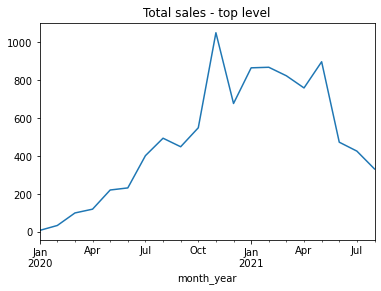

In [28]:
hierarchy_df["total_sales"].plot(title = "Total sales - top level")

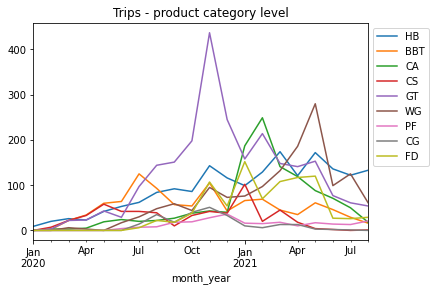

In [29]:
ax = hierarchy_df[hierarchy["total"]].plot(title="Trips - product category level")
ax.legend(bbox_to_anchor=(1.0, 1.0));


In [30]:
# run loop to plot graphs for all categories

# Hierachial-Time-Series Feature-Eng

In [31]:
train_data = hierarchy_df[ : "2021-04-01"]
validation_data = hierarchy_df[ "2021-05-01": ]

In [32]:
train_data.tail()

,BBT_bed1,BBT_bed2,BBT_bed3,BBT_bed4,BBT_bed5,CA_computers1,CA_computers2,CA_computers3,CA_computers4,CA_computers5,...,BBT,CA,CG,CS,FD,GT,HB,PF,WG,total_sales
month_year,,,,,,,,,,,,,,,,,,,,,
2020-12-01,6.0,18.0,7.0,12.0,0.0,1.0,12.0,2.0,23.0,2.0,...,43.0,40.0,33.0,38.0,54.0,245.0,116.0,36.0,73.0,678
2021-01-01,19.0,17.0,11.0,19.0,0.0,31.0,29.0,5.0,43.0,57.0,...,66.0,187.0,10.0,102.0,152.0,158.0,99.0,16.0,76.0,866
2021-02-01,18.0,22.0,13.0,16.0,0.0,30.0,71.0,3.0,31.0,45.0,...,69.0,249.0,6.0,20.0,70.0,214.0,129.0,15.0,97.0,869
2021-03-01,17.0,17.0,3.0,8.0,0.0,13.0,27.0,0.0,44.0,6.0,...,45.0,141.0,13.0,45.0,108.0,148.0,174.0,18.0,132.0,824
2021-04-01,13.0,6.0,9.0,7.0,0.0,5.0,13.0,0.0,56.0,10.0,...,35.0,119.0,13.0,18.0,117.0,141.0,121.0,10.0,186.0,760


In [33]:
validation_data.head()

,BBT_bed1,BBT_bed2,BBT_bed3,BBT_bed4,BBT_bed5,CA_computers1,CA_computers2,CA_computers3,CA_computers4,CA_computers5,...,BBT,CA,CG,CS,FD,GT,HB,PF,WG,total_sales
month_year,,,,,,,,,,,,,,,,,,,,,
2021-05-01,19.0,26.0,14.0,2.0,0.0,0.0,11.0,0.0,25.0,0.0,...,61.0,88.0,3.0,4.0,120.0,153.0,172.0,17.0,280.0,898
2021-06-01,5.0,23.0,14.0,4.0,0.0,4.0,10.0,0.0,27.0,3.0,...,46.0,71.0,2.0,2.0,27.0,77.0,136.0,14.0,99.0,474
2021-07-01,8.0,10.0,9.0,2.0,0.0,18.0,7.0,0.0,9.0,3.0,...,29.0,50.0,1.0,0.0,26.0,61.0,122.0,13.0,125.0,427
2021-08-01,8.0,7.0,1.0,0.0,0.0,1.0,2.0,0.0,10.0,0.0,...,16.0,18.0,0.0,1.0,29.0,54.0,133.0,21.0,61.0,333


ARIMA MODEL

In [35]:
import hts

In [36]:
# bottom up approach
model_arima_1 = hts.HTSRegressor(model = 'auto_arima', revision_method = 'BU', n_jobs = 0)

In [ ]:
model_arima_1 = model_arima_1.fit(train_data, hierarchy)
pred_arima_1 = model_arima_1.predict(steps_ahead = 4)